# On the gravitational interaction of plane symmetric clouds of null dust by Tsoubelis & Wang
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 25, 2021 Christmas Day and launch of JWST!!

PLEASE NOTE!!  Metric 1.7 has a nonzero V.  Metric 1.2 has V set equal to zero.  The field equations are derived from Metric 1.2 so we set V equal to zero

Here we derive the vacuum field equations for metric 1.7  The paper lists the components of the Ricci tensor as equation 2.1 and the field equations with a massless scalar field as equation 2.7  We've changed the function M to L and it seems to compute.  No idea why

https://aip.scitation.org/doi/10.1063/1.529377

In [38]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [39]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [40]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [41]:
L = Function('L')(u,v)
L

In [42]:
U = Function('U')(u,v)
U

In [43]:
V = Function('V')(u,v)
V

In [44]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [45]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [46]:
lineElement = expand(2*exp(-L)*du*dv -exp(-U)*(exp(V)*dx**2 + exp(-V)*dy**2 )).subs(V,0)
lineElement

In [47]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -L(u, v)                        ⎤
⎢    0      ℯ              0           0     ⎥
⎢                                            ⎥
⎢ -L(u, v)                                   ⎥
⎢ℯ              0          0           0     ⎥
⎢                                            ⎥
⎢                        -U(u, v)            ⎥
⎢    0          0      -ℯ              0     ⎥
⎢                                            ⎥
⎢                                    -U(u, v)⎥
⎣    0          0          0       -ℯ        ⎦

In [48]:
import sympy

In [49]:
m = sympy.Array(g)
m

⎡            -L(u, v)                        ⎤
⎢    0      ℯ              0           0     ⎥
⎢                                            ⎥
⎢ -L(u, v)                                   ⎥
⎢ℯ              0          0           0     ⎥
⎢                                            ⎥
⎢                        -U(u, v)            ⎥
⎢    0          0      -ℯ              0     ⎥
⎢                                            ⎥
⎢                                    -U(u, v)⎥
⎣    0          0          0       -ℯ        ⎦

In [50]:
from einsteinpy.symbolic import *

In [51]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [52]:
metric = MetricTensor(m,syms)

In [53]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢⎡ ∂                                                                                 ⎤  ⎡0       0                       0 
⎢⎢-──(L(u, v))  0                 0                                 0                ⎥  ⎢                                  
⎢⎢ ∂u                                                                                ⎥  ⎢    ∂                             
⎢⎢                                                                                   ⎥  ⎢0  -──(L(u, v))                 0 
⎢⎢     0        0                 0                                 0                ⎥  ⎢    ∂v                            
⎢⎢                                                                                   ⎥  ⎢                                  
⎢⎢                   L(u, v) - U(u, v) ∂                                             ⎥  ⎢                   L(u, v) - U(u, 
⎢⎢      

In [54]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                         2                                                                                
⎢                            ⎛∂          ⎞                      ∂           ∂                                              
⎢                            ⎜──(U(u, v))⎟      2               ──(U(u, v))⋅──(U(u, v))      2                2            
⎢  ∂           ∂             ⎝∂u         ⎠     ∂                ∂u          ∂v              ∂                ∂             
⎢  ──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v))    - ─────────────────────── + ─────(L(u, v)) + ─────(U(u, v))  
⎢  ∂u          ∂u                  2            2                          2              ∂v ∂u            ∂v ∂u           
⎢                                             ∂u                                                                           
⎢                                                                                                                          
⎢       

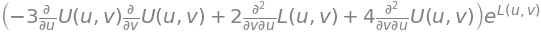

In [55]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [56]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                                                                                  
⎢                          ⎛∂          ⎞                                                                                   
⎢                          ⎜──(U(u, v))⎟      2                                                 2                          
⎢∂           ∂             ⎝∂u         ⎠     ∂                     ∂           ∂               ∂                           
⎢──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v))       1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))                
⎢∂u          ∂u                  2            2                    ∂u          ∂v            ∂v ∂u                         
⎢                                           ∂u                                                                             
⎢                                                                                                                          
⎢       

In [57]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                              ⎡                    2                ⎤                     
⎢                                                              ⎢                   ∂                 ⎥                     
⎢       

In [58]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                    ⎡                     
⎢                                                                                                    ⎢                     
⎢                                                                                                    ⎢                     
⎢                                                                                                    ⎢                     
⎢                                                                                                    ⎢                     
⎢                                           ⎡0  0  0  0⎤                                             ⎢                     
⎢                                           ⎢          ⎥                                             ⎢                     
⎢                                           ⎢0  0  0  0⎥                                             ⎢⎛   2                
⎢       

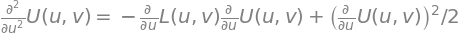

In [63]:
#  See equation 2.1a 

Eq(diff(U,u,u),expand(solve( einst.tensor()[0,0], diff(U,u,u) )[0] ))

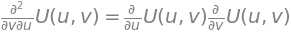

In [61]:
#  This is the far right term of equation 2.1d

constraint = Eq(diff(U,u,v),solve( simplify(einst.tensor())[1,0], diff(U,u,v) )[0] )
constraint

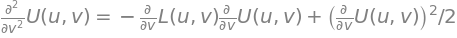

In [69]:
#  See equation 2.1b

Eq(diff(U,v,v),expand(solve( Ric.tensor()[1,1] , diff(U,v,v) )[0]))

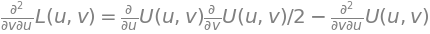

In [83]:
#  See Equation 2.1 c

Eq( diff(L,u,v),solve( Ric.tensor()[0,1], diff(L,u,v) )[0] )

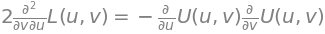

In [78]:
#  See equation 2.1b - This is the reduction of 2.1b after substituting in the constraint 

Eq(2*diff(L,u,v),2*solve( Ric.tensor()[0,1] , diff(L,u,v) )[0]).subs(constraint.args[0],constraint.args[1] )

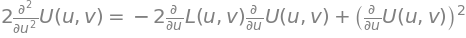

In [91]:
equation2pt7a = Eq(2*diff(U,u,u),2*expand(solve( einst.tensor()[0,0], diff(U,u,u) )[0] ))
equation2pt7a

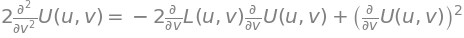

In [86]:
equation2pt7b = Eq(2*diff(U,v,v),2*expand(solve( Ric.tensor()[1,1] , diff(U,v,v) )[0]))
equation2pt7b

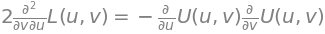

In [88]:
equation2pt7c = Eq(2*diff(L,u,v),2*solve( Ric.tensor()[0,1] , diff(L,u,v) )[0]).subs(constraint.args[0],constraint.args[1] )
equation2pt7c

In [92]:
vacuumFieldEquations = Matrix([equation2pt7a,equation2pt7b,equation2pt7c])
vacuumFieldEquations

⎡    2                                                       2⎤
⎢   ∂                 ∂           ∂             ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(L(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟ ⎥
⎢    2                ∂u          ∂u            ⎝∂u         ⎠ ⎥
⎢  ∂u                                                         ⎥
⎢                                                             ⎥
⎢    2                                                       2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(L(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟ ⎥
⎢    2                ∂v          ∂v            ⎝∂v         ⎠ ⎥
⎢  ∂v                                                         ⎥
⎢                                                             ⎥
⎢              2                                              ⎥
⎢             ∂               ∂           ∂                   ⎥
⎢         2⋅─────(L(u, v)) = -──(U(u, v))⋅──(U(u, v))         ⎥
⎣           ∂v ∂u             ∂u        